In [28]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt  # to plot
import matplotlib as mpl

from scipy import optimize       # to compare

import seaborn as sns
sns.set(context="talk", style="darkgrid", palette="hls", font="sans-serif", font_scale=1.05)

FIGSIZE = (19, 8)  #: Figure size, in inches!
mpl.rcParams['figure.figsize'] = FIGSIZE

In [20]:
def annealing(random_start,
              cost_function,
              random_neighbour,
              acceptance,
              temperature,
              maxsteps=1000,
              debug=True):
    """ Optimize the black-box function 'cost_function' with the simulated annealing algorithm."""
    state = random_start()
    cost = cost_function(state)
    states, costs = [state], [cost]
    for step in range(maxsteps):
        fraction = step / float(maxsteps)
        T = temperature(fraction)
        new_state = random_neighbour(state, fraction)
        new_cost = cost_function(new_state)
        if debug: print("Step #{:>2}/{:>2} : T = {:>4.3g}, state = {:>4.3g}, cost = {:>4.3g}, new_state = {:>4.3g}, new_cost = {:>4.3g} ...".format(step, maxsteps, T, state, cost, new_state, new_cost))
        if acceptance_probability(cost, new_cost, T) > rn.random():
            state, cost = new_state, new_cost
            states.append(state)
            costs.append(cost)
            # print("  ==> Accept it!")
        # else:
        #    print("  ==> Reject it...")
    return state, cost_function(state), states, costs

In [21]:
interval = (-10, 10)

def f(x):
    """ Function to minimize."""
    return x ** 2

def clip(x):
    """ Force x to be in the interval."""
    a, b = interval
    return max(min(x, b), a)

In [22]:
def random_start():
    """ Random point in the interval."""
    a, b = interval
    return a + (b - a) * rn.random_sample()

In [23]:
def cost_function(x):
    """ Cost of x = f(x)."""
    return f(x)

In [24]:
def random_neighbour(x, fraction=1):
    """Move a little bit x, from the left or the right."""
    amplitude = (max(interval) - min(interval)) * fraction / 10
    delta = (-amplitude/2.) + amplitude * rn.random_sample()
    return clip(x + delta)

In [25]:
def acceptance_probability(cost, new_cost, temperature):
    if new_cost < cost:
        # print("    - Acceptance probabilty = 1 as new_cost = {} < cost = {}...".format(new_cost, cost))
        return 1
    else:
        p = np.exp(- (new_cost - cost) / temperature)
        # print("    - Acceptance probabilty = {:.3g}...".format(p))
        return p

In [26]:
def temperature(fraction):
    """ Example of temperature dicreasing as the process goes on."""
    return max(0.01, min(1, 1 - fraction))

In [29]:
annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=30, debug=True);

Step # 0/30 : T =    1, state = -0.507, cost = 0.257, new_state = -0.507, new_cost = 0.257 ...
Step # 1/30 : T = 0.967, state = -0.507, cost = 0.257, new_state = -0.492, new_cost = 0.242 ...
Step # 2/30 : T = 0.933, state = -0.492, cost = 0.242, new_state = -0.435, new_cost = 0.19 ...
Step # 3/30 : T =  0.9, state = -0.435, cost = 0.19, new_state = -0.447, new_cost =  0.2 ...
Step # 4/30 : T = 0.867, state = -0.447, cost =  0.2, new_state = -0.534, new_cost = 0.285 ...
Step # 5/30 : T = 0.833, state = -0.534, cost = 0.285, new_state = -0.606, new_cost = 0.367 ...
Step # 6/30 : T =  0.8, state = -0.606, cost = 0.367, new_state = -0.801, new_cost = 0.641 ...
Step # 7/30 : T = 0.767, state = -0.801, cost = 0.641, new_state = -0.782, new_cost = 0.611 ...
Step # 8/30 : T = 0.733, state = -0.782, cost = 0.611, new_state = -0.772, new_cost = 0.596 ...
Step # 9/30 : T =  0.7, state = -0.772, cost = 0.596, new_state = -0.909, new_cost = 0.826 ...
Step #10/30 : T = 0.667, state = -0.909, cost = 

In [30]:
state, c, states, costs = annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=1000, debug=False)

state
c

0.0193197625891387

In [31]:
def see_annealing(states, costs):
    plt.figure()
    plt.suptitle("Evolution of states and costs of the simulated annealing")
    plt.subplot(121)
    plt.plot(states, 'r')
    plt.title("States")
    plt.subplot(122)
    plt.plot(costs, 'b')
    plt.title("Costs")
    plt.show()

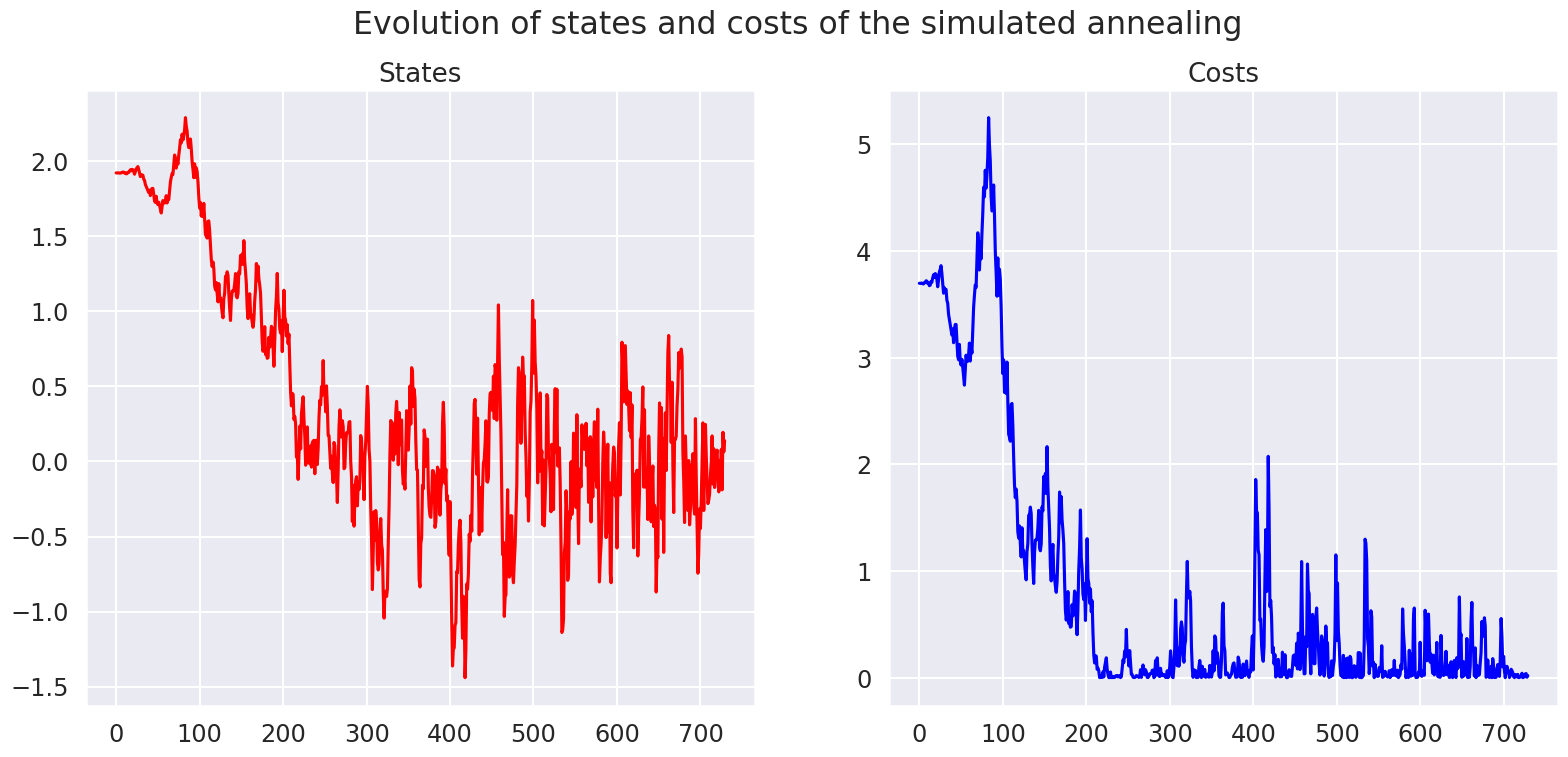

In [32]:
see_annealing(states, costs)

In [33]:
def visualize_annealing(cost_function):
    state, c, states, costs = annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=1000, debug=False)
    see_annealing(states, costs)
    return state, c

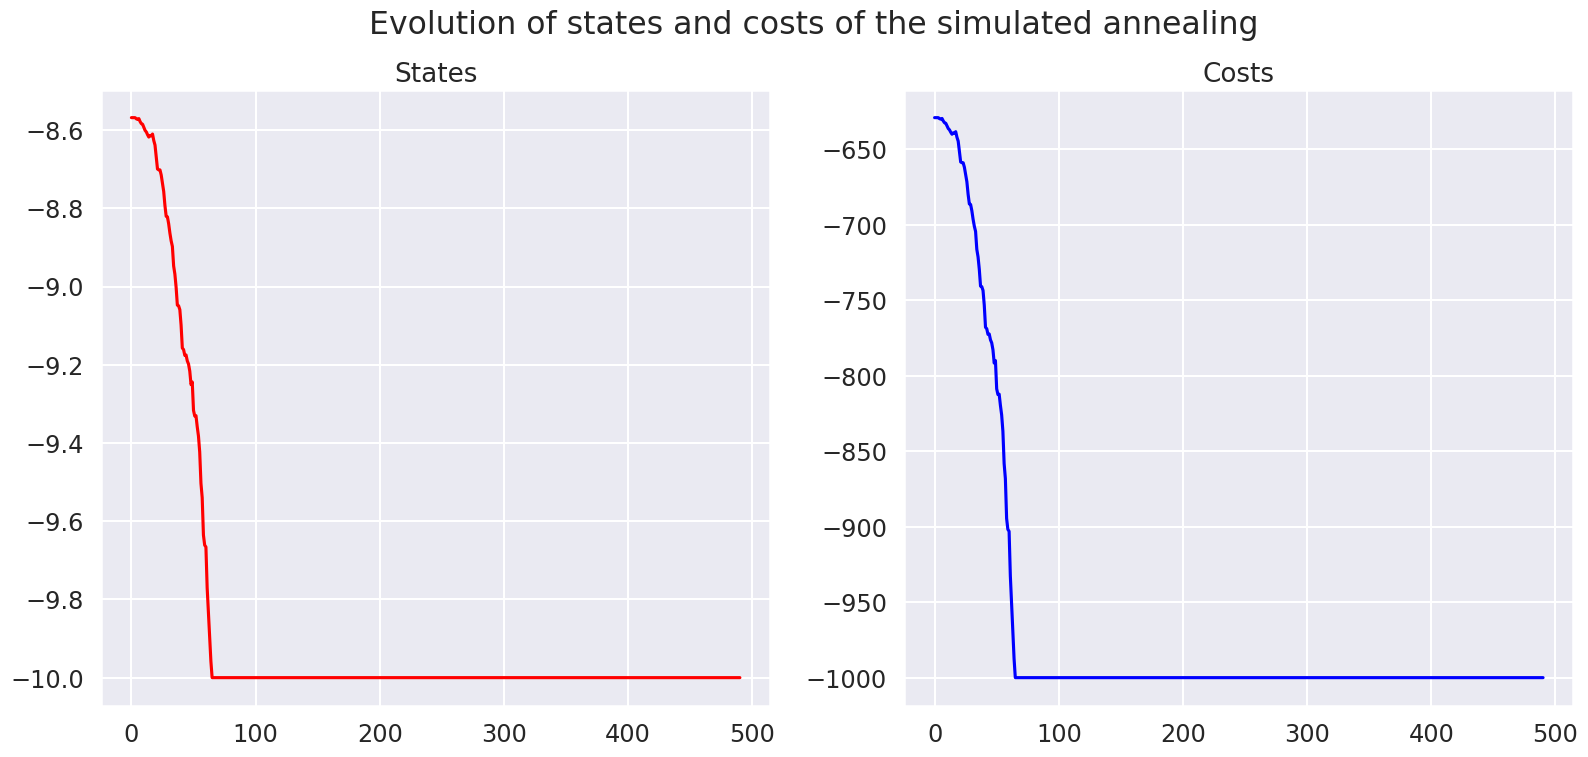

(-10, -1000)

In [34]:
visualize_annealing(lambda x: x**3)

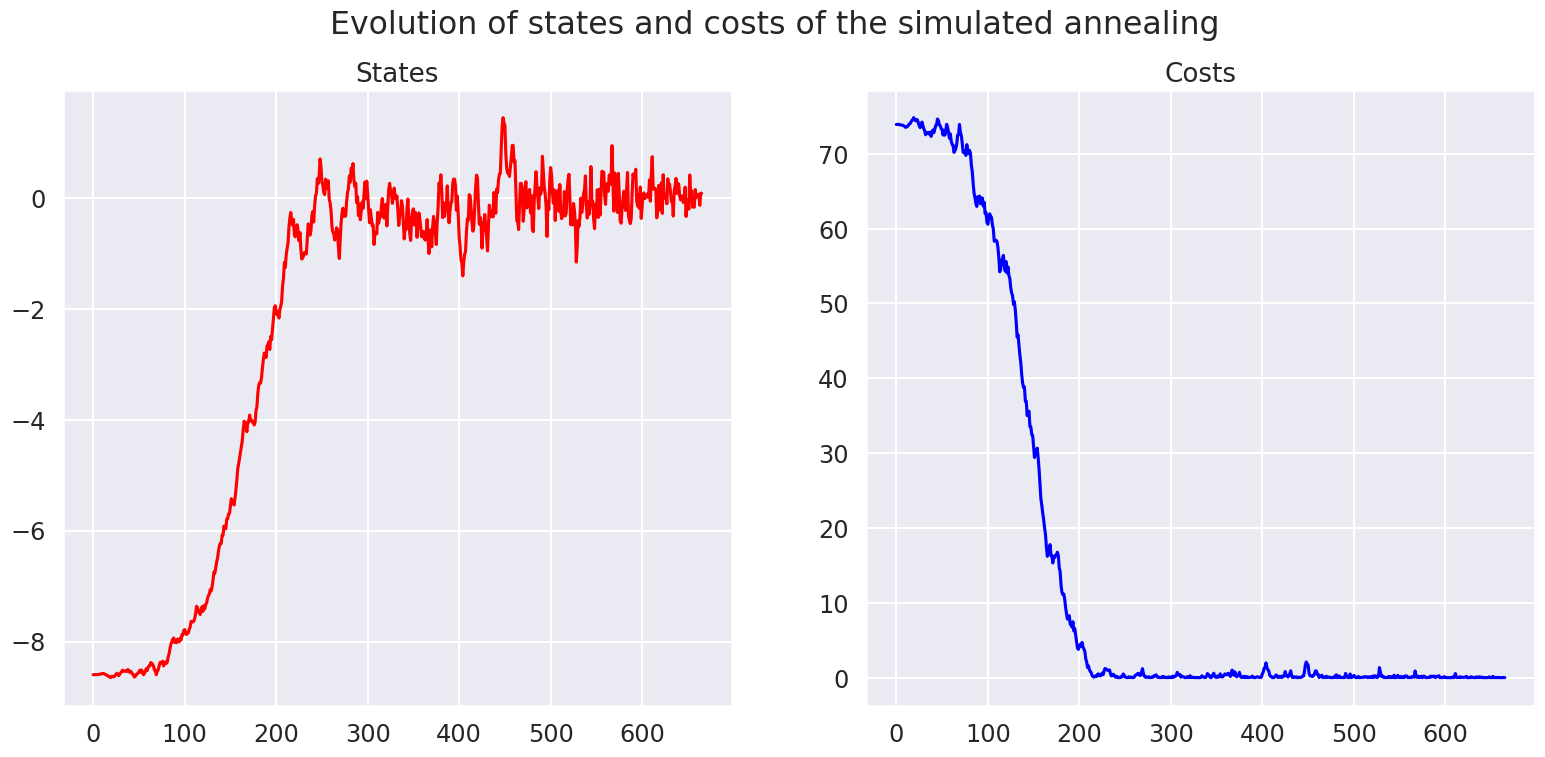

(0.08148860700641097, 0.0066403930718452915)

In [35]:
visualize_annealing(lambda x: x**2)

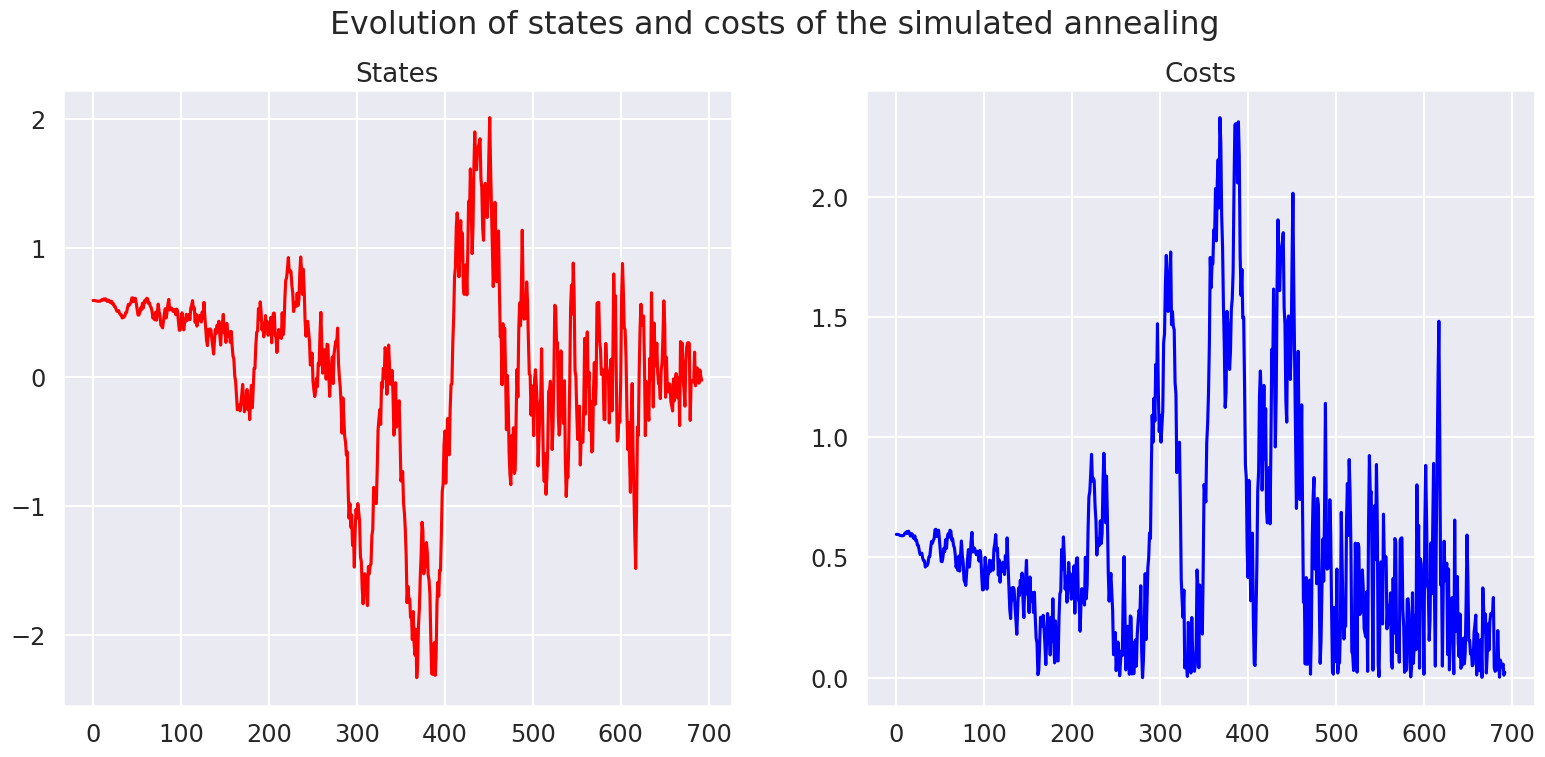

(-0.02260339816876933, 0.02260339816876933)

In [36]:
visualize_annealing(np.abs)

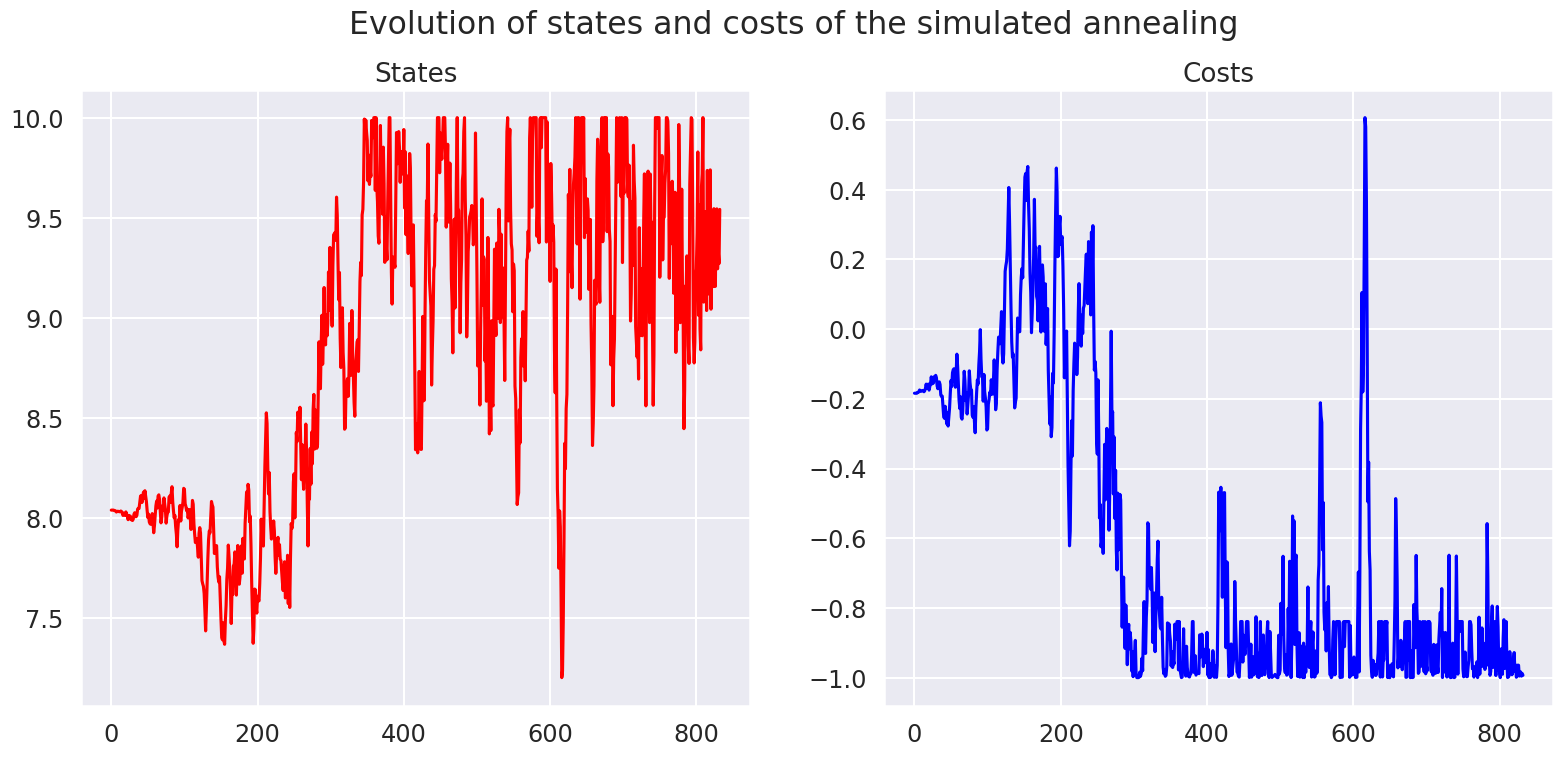

(9.541386667739362, -0.9932089051745985)

In [37]:
visualize_annealing(np.cos)

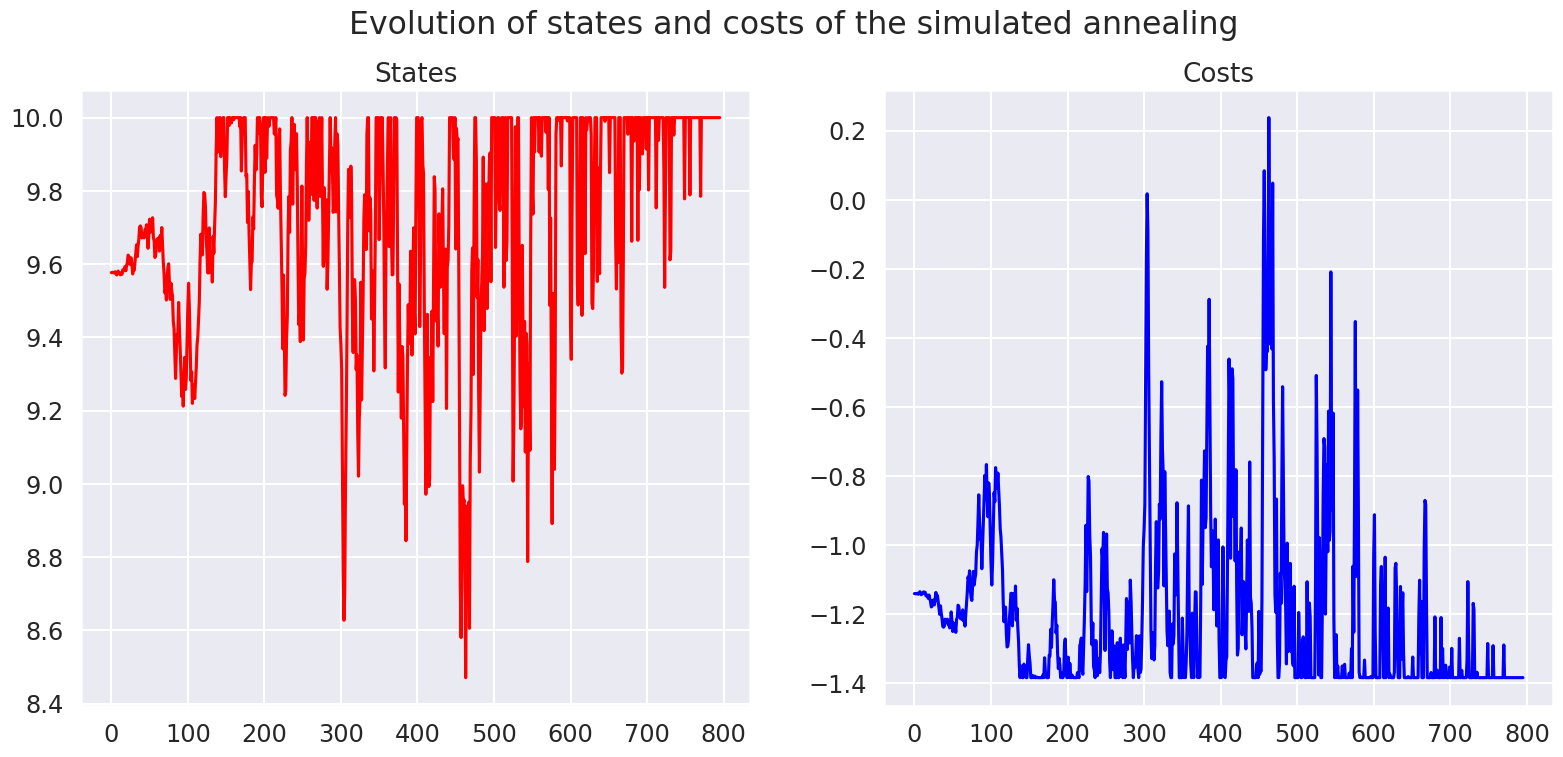

(10, -1.383092639965822)

In [38]:
visualize_annealing(lambda x: np.sin(x) + np.cos(x))